<center><h1> IFT-6758  Data Science  </h1></center>
<center><h2> Fall - 2020 </h2></center> 
<center><h3> Kaggle Competition</h3></center> 
<center><h3> </h3></center> 
<center><h3> Prediction Program</h3></center> 



**Instructions**


1.   Find the best amound of features to be selected
2.   Go to the Predict Kaggle Data Section and run the code to get test values



# Read train data

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import sklearn
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import minmax_scale

In [5]:
train_data = pd.read_pickle("train_cleaned_colors.pkl")
test_data = pd.read_pickle("test_cleaned_colors.pkl")
id_test = test_data['Id']
train_data

,Id,Personal URL,Profile Cover Image Status,Profile Text Color R,Profile Text Color G,Profile Text Color B,Profile Page Color R,Profile Page Color G,Profile Page Color B,Profile Theme Color R,...,39600,46800,Not verified,Pending,Verified,business,celebrity,government,unknown,Num of Profile Likes
2,JS49LP5P72RI1OQB,0,1,0.121569,0.760784,0.870588,0.937255,0.937255,0.937255,0.121569,...,0,0,1,0,0,0,0,0,1,3.193125
4,CRSEMK4QER6LDJSA,1,1,0.345098,0.258824,0.301961,0.968627,0.968627,0.968627,0.000000,...,0,0,1,0,0,0,0,0,1,3.033021
5,0FEKBQ59AF1LQKJP,1,1,0.000000,0.486275,0.760784,0.866667,0.933333,0.964706,0.203922,...,0,0,0,0,1,0,1,0,0,2.230449
8,ORJN6I5G6NA6QD0Q,0,1,0.960784,0.670588,0.709804,0.878431,0.878431,0.878431,0.878431,...,0,0,0,0,1,0,0,0,1,3.093071
9,5JIAFD6132MNPAL9,0,1,0.113725,0.631373,0.949020,0.866667,0.933333,0.964706,0.752941,...,0,0,1,0,0,0,0,1,0,2.722634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7490,EQM27ASK6HGQHDTB,0,1,0.113725,0.631373,0.949020,0.866667,0.933333,0.964706,0.752941,...,0,0,1,0,0,0,0,0,1,3.820661
7492,3QIOBBC2TCMCMOM8,0,1,0.000000,0.517647,0.705882,0.866667,0.933333,0.964706,0.752941,...,1,0,0,0,1,0,0,0,1,3.388101
7494,QSFDKHOHMHRNGS65,1,1,0.000000,0.517647,0.705882,0.866667,0.933333,0.964706,0.752941,...,0,0,0,0,1,0,0,0,1,2.588832
7495,KP5DR7CTN8CNLG8P,0,0,0.286275,0.027451,0.027451,0.866667,0.933333,0.964706,0.000000,...,0,0,0,0,1,0,0,0,1,3.137987


In [6]:
train_data.drop(columns=['Id', 'Profile Image'], inplace=True)
test_data.drop(columns=['Id', 'Profile Image'], inplace=True)
train_data

,Personal URL,Profile Cover Image Status,Profile Text Color R,Profile Text Color G,Profile Text Color B,Profile Page Color R,Profile Page Color G,Profile Page Color B,Profile Theme Color R,Profile Theme Color G,...,39600,46800,Not verified,Pending,Verified,business,celebrity,government,unknown,Num of Profile Likes
2,0,1,0.121569,0.760784,0.870588,0.937255,0.937255,0.937255,0.121569,0.760784,...,0,0,1,0,0,0,0,0,1,3.193125
4,1,1,0.345098,0.258824,0.301961,0.968627,0.968627,0.968627,0.000000,0.000000,...,0,0,1,0,0,0,0,0,1,3.033021
5,1,1,0.000000,0.486275,0.760784,0.866667,0.933333,0.964706,0.203922,0.576471,...,0,0,0,0,1,0,1,0,0,2.230449
8,0,1,0.960784,0.670588,0.709804,0.878431,0.878431,0.878431,0.878431,0.800000,...,0,0,0,0,1,0,0,0,1,3.093071
9,0,1,0.113725,0.631373,0.949020,0.866667,0.933333,0.964706,0.752941,0.870588,...,0,0,1,0,0,0,0,1,0,2.722634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7490,0,1,0.113725,0.631373,0.949020,0.866667,0.933333,0.964706,0.752941,0.870588,...,0,0,1,0,0,0,0,0,1,3.820661
7492,0,1,0.000000,0.517647,0.705882,0.866667,0.933333,0.964706,0.752941,0.870588,...,1,0,0,0,1,0,0,0,1,3.388101
7494,1,1,0.000000,0.517647,0.705882,0.866667,0.933333,0.964706,0.752941,0.870588,...,0,0,0,0,1,0,0,0,1,2.588832
7495,0,0,0.286275,0.027451,0.027451,0.866667,0.933333,0.964706,0.000000,0.000000,...,0,0,0,0,1,0,0,0,1,3.137987


In [7]:
#Facultatif
#train_data.drop(columns=['Profile Creation Month', 'Profile Creation Day', 'Profile Creation WeekDay', 'Profile Creation Hour', 'User Language'], inplace=True)
#test_data.drop(columns=['Profile Creation Month', 'Profile Creation Day', 'Profile Creation WeekDay', 'Profile Creation Hour', 'User Language'], inplace=True)

In [8]:
#Temp drop
#train_data.drop(columns=["Num of Followers", "Num of People Following", "Num of Status Updates", "Num of Direct Messages"], inplace=True)
#train_data = train_data[["Num of Followers", "Num of People Following", "Num of Status Updates", "Num of Direct Messages", "Num of Profile Likes"]]
#train_data = train_data[["Is Profile View Size Customized?", "Avg Daily Profile Visit Duration in seconds", "Profile Creation WeekDay", "Avg Daily Profile Clicks", "Num of Profile Likes"]]
#train_data = train_data[["Num of People Following", "Avg Daily Profile Clicks", "Num of Profile Likes"]]
#train_data = train_data[["Num of People Following", "Num of Status Updates", "Num of Profile Likes"]]

<AxesSubplot:>

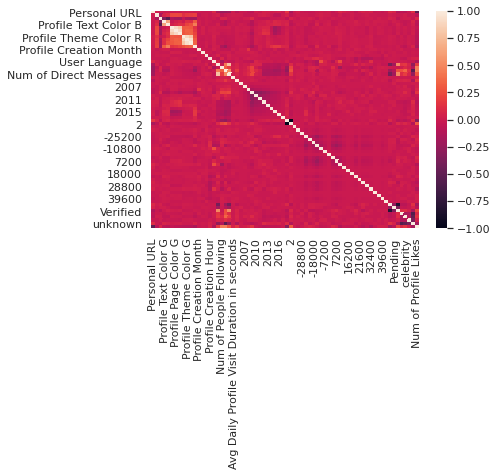

In [9]:
corr =train_data.corr()
sns.heatmap(corr)

In [10]:
cor_data = train_data
cor_data.dtypes

Personal URL                    int64
Profile Cover Image Status      int64
Profile Text Color R          float64
Profile Text Color G          float64
Profile Text Color B          float64
                               ...   
business                        uint8
celebrity                       uint8
government                      uint8
unknown                         uint8
Num of Profile Likes          float64
Length: 70, dtype: object

In [11]:
train = cor_data.to_numpy()
Y_likes = train[:, -1] # for last column
X_likes = train[:, :-1] # for all but last column

X_Kaggle = test_data.to_numpy()

X_likes_scaled = minmax_scale(X_likes)

In [12]:
columnsNamesArr = cor_data.columns.values
labels = columnsNamesArr[:-1]

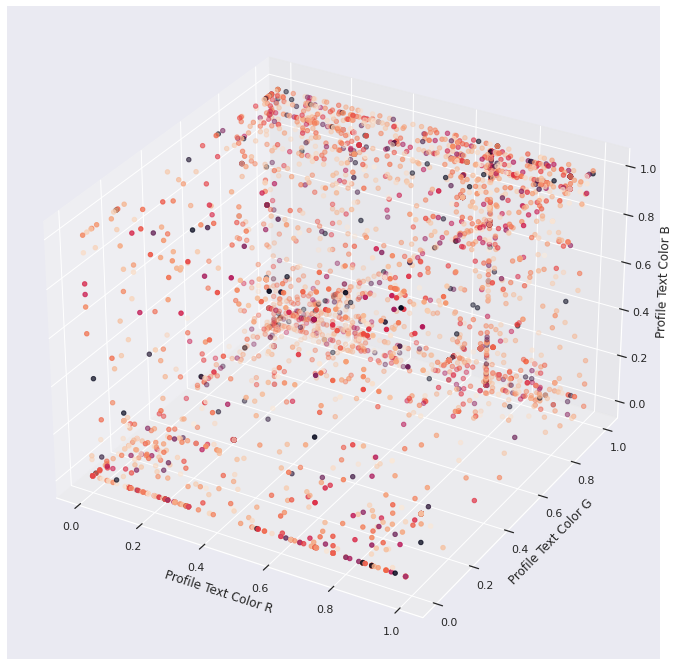

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

xs = train_data["Profile Text Color B"]
ys = train_data["Profile Page Color B"]
zs = train_data["Profile Theme Color B"]
ax.scatter(xs, ys, zs, c=train_data["Num of Profile Likes"])

ax.set_xlabel('Profile Text Color R')
ax.set_ylabel('Profile Text Color G')
ax.set_zlabel('Profile Text Color B')

plt.show()

In [11]:
from mpl_toolkits.mplot3d import Axes3D
ax = Axes3D(fig)
ax.scatter(xs,ys,zs, marker='o', s=20, c=train_data["Num of Profile Likes"], alpha=0.6)
for ii in range(0,360,1):
    ax.view_init(elev=10., azim=ii)
    fig.savefig("movie/%d.png" % ii)

KeyboardInterrupt: 

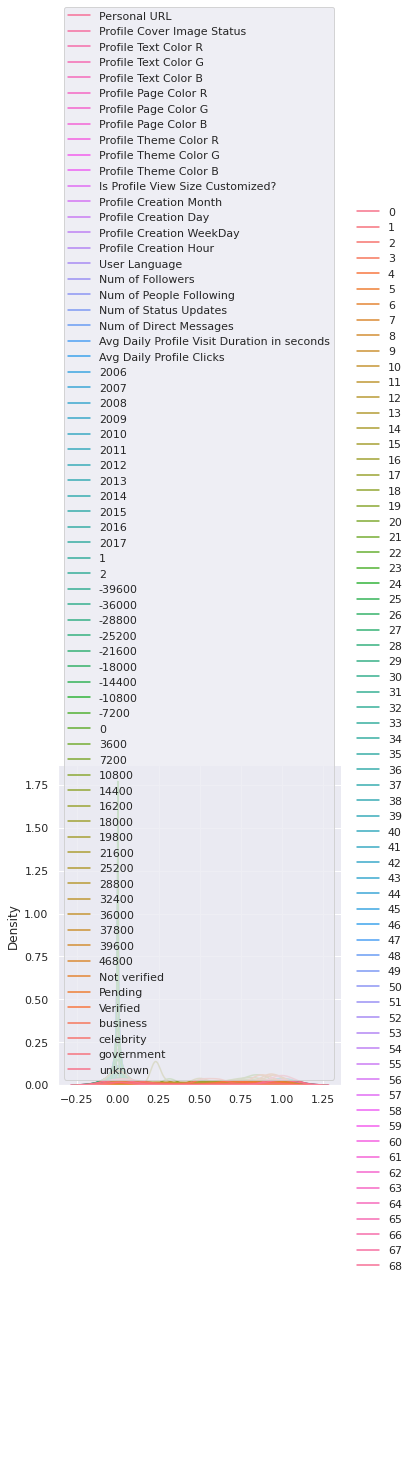

In [13]:
sns.displot(data=X_likes_scaled, kind='kde', legend=True);
plt.legend(labels)


**Scaling and selecting features**

In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression
model = SelectKBest(f_regression, k=30)
X_selected_feat_likes = model.fit_transform(X_likes_scaled, Y_likes)
mask = np.array(model.get_support(indices=True))

selected_feats = [labels[l] for l in mask]
print(selected_feats)

['Personal URL', 'Profile Cover Image Status', 'Profile Text Color R', 'Profile Text Color B', 'Profile Theme Color R', 'Profile Theme Color G', 'Profile Theme Color B', 'Is Profile View Size Customized?', 'User Language', 'Num of Followers', 'Num of People Following', 'Num of Status Updates', 'Num of Direct Messages', 'Avg Daily Profile Clicks', 2008, 2009, 2012, 1, 2, -21600, 3600, 10800, 25200, 32400, 'Not verified', 'Pending', 'Verified', 'business', 'celebrity', 'unknown']


In [15]:
len(selected_feats)

30

**This was to find the best number of selected features, no need to run it every time**

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import datasets, ensemble
from sklearn.ensemble import GradientBoostingRegressor

best_i = 0
best_rmse = 10
k_losses = []
k_labels = []

regressor = GradientBoostingRegressor(random_state=0)
regressor.fit(train[:,:-1], train[:, -1])

for i in range(2, X_likes.shape[1]):

  selector = RFE(regressor, i)
  selector = selector.fit(X_likes, Y_likes)
  rfe_values = selector.get_support()
  
  X_selected_feat_likes = X_likes[:, rfe_values]
  X_selected_feat_likes.shape

  # split dataset to train and test
  X_train, X_test, y_train, y_test = train_test_split(
    X_selected_feat_likes, Y_likes, 
    test_size=0.2, 
    shuffle=True, 
    random_state=42 #  To guarantee that the split will always be the same
  )

  k_losses.append(CV(GradientBoostingRegressor, X_train, y_train, 10, random_state=0))
  k_labels.append(str(i))

  rmse = k_losses[-1].mean()
  if rmse < best_rmse:
    best_rmse = rmse
    best_i = i
  print(f"RMSE {i} -> {rmse}")

RMSE 2 -> 0.8409448419952883
RMSE 3 -> 0.809800951769245
RMSE 4 -> 0.806875286390427
RMSE 5 -> 0.806875286390427
RMSE 6 -> 0.7968522067245086
RMSE 7 -> 0.7916398746471682
RMSE 8 -> 0.7954779482930443
RMSE 9 -> 0.7957016276282693
RMSE 10 -> 0.7667770503750888
RMSE 11 -> 0.7604048245073592
RMSE 12 -> 0.7587915270555412
RMSE 13 -> 0.7572810429913122
RMSE 14 -> 0.7510306595889936
RMSE 15 -> 0.7455090147641541
RMSE 16 -> 0.7483189262704897
RMSE 17 -> 0.7535069555109482
RMSE 18 -> 0.7495569096267737
RMSE 19 -> 0.7445682243081521
RMSE 20 -> 0.7401552844502607
RMSE 21 -> 0.7415271070165138
RMSE 22 -> 0.7451587947649435
RMSE 23 -> 0.7416274645039584
RMSE 24 -> 0.7449933203098753
RMSE 25 -> 0.7437175668197403
RMSE 26 -> 0.7437235214011146
RMSE 27 -> 0.7441943714113737
RMSE 28 -> 0.7462385918087979
RMSE 29 -> 0.7466757893412614
RMSE 30 -> 0.7473376350886518
RMSE 31 -> 0.7449027536306354
RMSE 32 -> 0.7430903662411008
RMSE 33 -> 0.75279534393908
RMSE 34 -> 0.744258391497236
RMSE 35 -> 0.73910500267

In [15]:
best_f = SelectKBest(f_regression, k=best_i)
X_selected_feat_likes = best_f.fit_transform(X_likes, Y_likes)

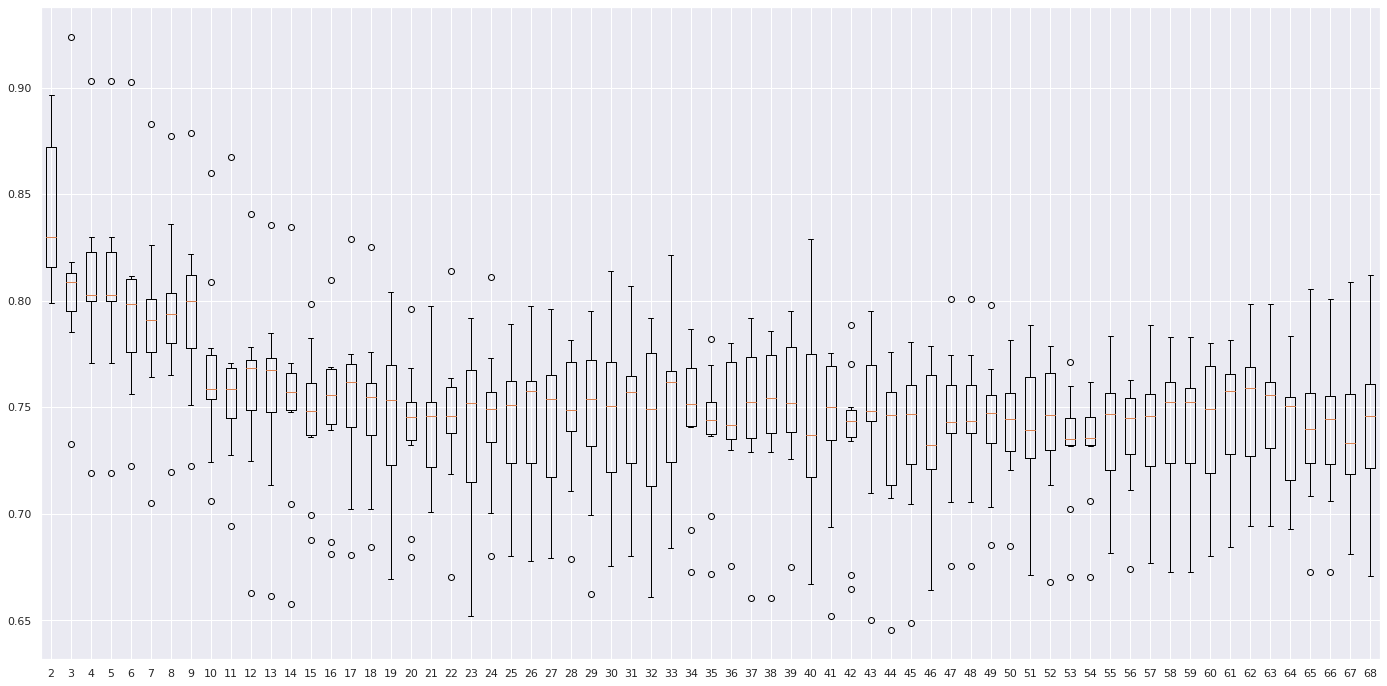

0.7321439994239558
54


In [60]:
# Executed with XGB regressor
plt.figure(figsize=(24,12))
plt.boxplot(k_losses, labels=k_labels)
plt.show()

print(best_rmse)
print(best_i)

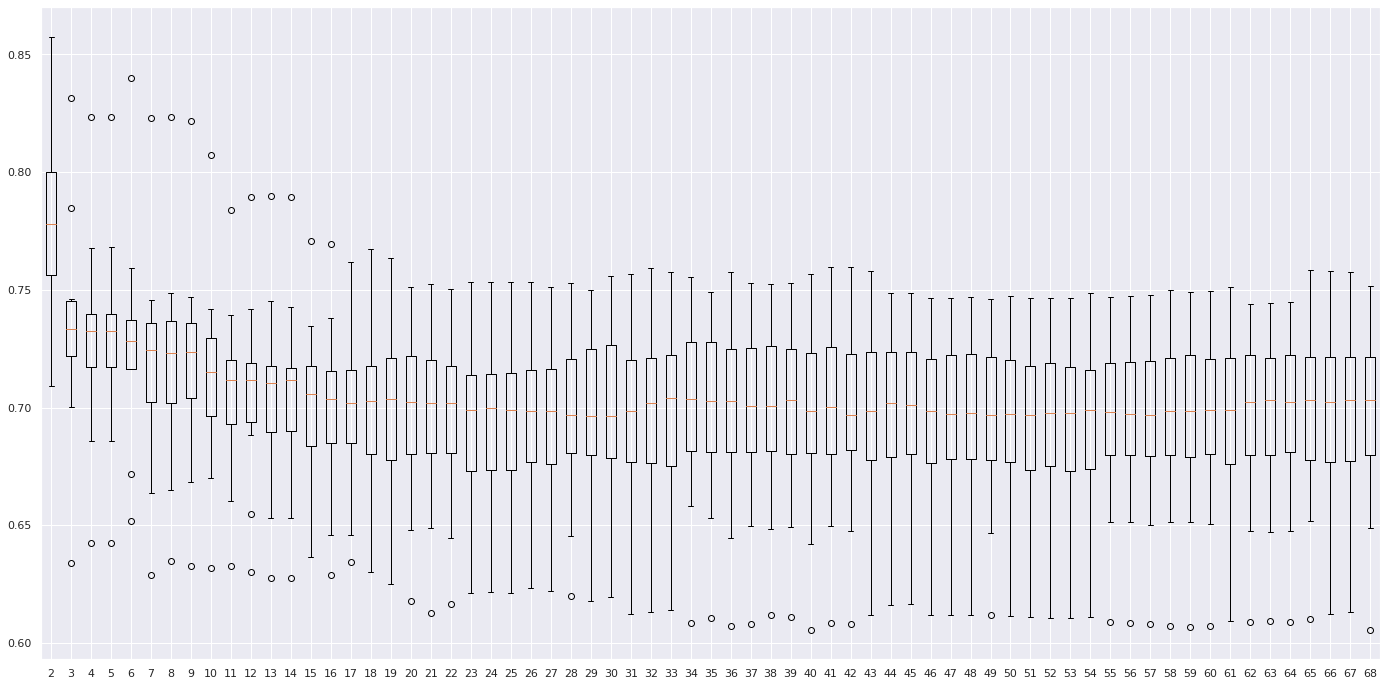

0.6909318340027333
53


In [55]:
# Executed with boosting gradient regressor
plt.figure(figsize=(24,12))
plt.boxplot(k_losses, labels=k_labels)
plt.show()

print(best_rmse)
print(best_i)

**Sklearn Pipeline**

In [17]:
from sklearn.model_selection import train_test_split

# split dataset to train and test
X_train, X_test, y_train, y_test = train_test_split(X_selected_feat_likes, Y_likes, 
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    random_state=42 #  To guarantee that the split will always be the same
                                                    )  


**Linear Regression Classifier**

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [19]:
## RMSE Metric
from sklearn.metrics import mean_squared_error
import math
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE -> {rmse}")

RMSE -> 0.6761429140078773


RMSE -> 0.7617407986671466

**Random Forest Classifier**

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

RMSE -> 0.7750671597407869

In [21]:
## RMSE Metric
from sklearn.metrics import mean_squared_error
import math
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE -> {rmse}")

RMSE -> 0.6903502271352229


**XGBoost Regressor**

In [22]:
from xgboost import XGBRegressor
from sklearn import datasets, ensemble
from sklearn.ensemble import AdaBoostClassifier
"""
params = {'n_estimators': 2000,
          'max_depth': 10,
          'min_samples_split': 10,
          'learning_rate': 0.001}
XGBModel = ensemble.GradientBoostingRegressor(**params)
XGBModel.fit(X_train, y_train)
"""

regressor = XGBRegressor()
regressor.fit(X_train,y_train, verbose=False)

y_pred = regressor.predict(X_test)

RMSE -> 0.7476484833959012

In [23]:
## RMSE Metric
from sklearn.metrics import mean_squared_error
import math
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE -> {rmse}")

RMSE -> 0.7345754856048091


**AdaBoost Regressor**


In [24]:
from sklearn.ensemble import AdaBoostRegressor
regressor = AdaBoostRegressor(random_state=0, n_estimators=100)
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)

In [25]:
## RMSE Metric
from sklearn.metrics import mean_squared_error
import math
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE -> {rmse}")

RMSE -> 0.8084199218782868


**SVR Regressor**

In [26]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
regressor = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

RMSE -> 0.7664196357813966

In [27]:
## RMSE Metric
from sklearn.metrics import mean_squared_error
import math
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE -> {rmse}")

RMSE -> 0.6942535657619741


**Gradient Boosting Regressor**

In [28]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor(random_state=0)
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

RMSE -> 0.7472080882179262

In [29]:
## RMSE Metric
from sklearn.metrics import mean_squared_error
import math
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE -> {rmse}")

RMSE -> 0.6669550838795414


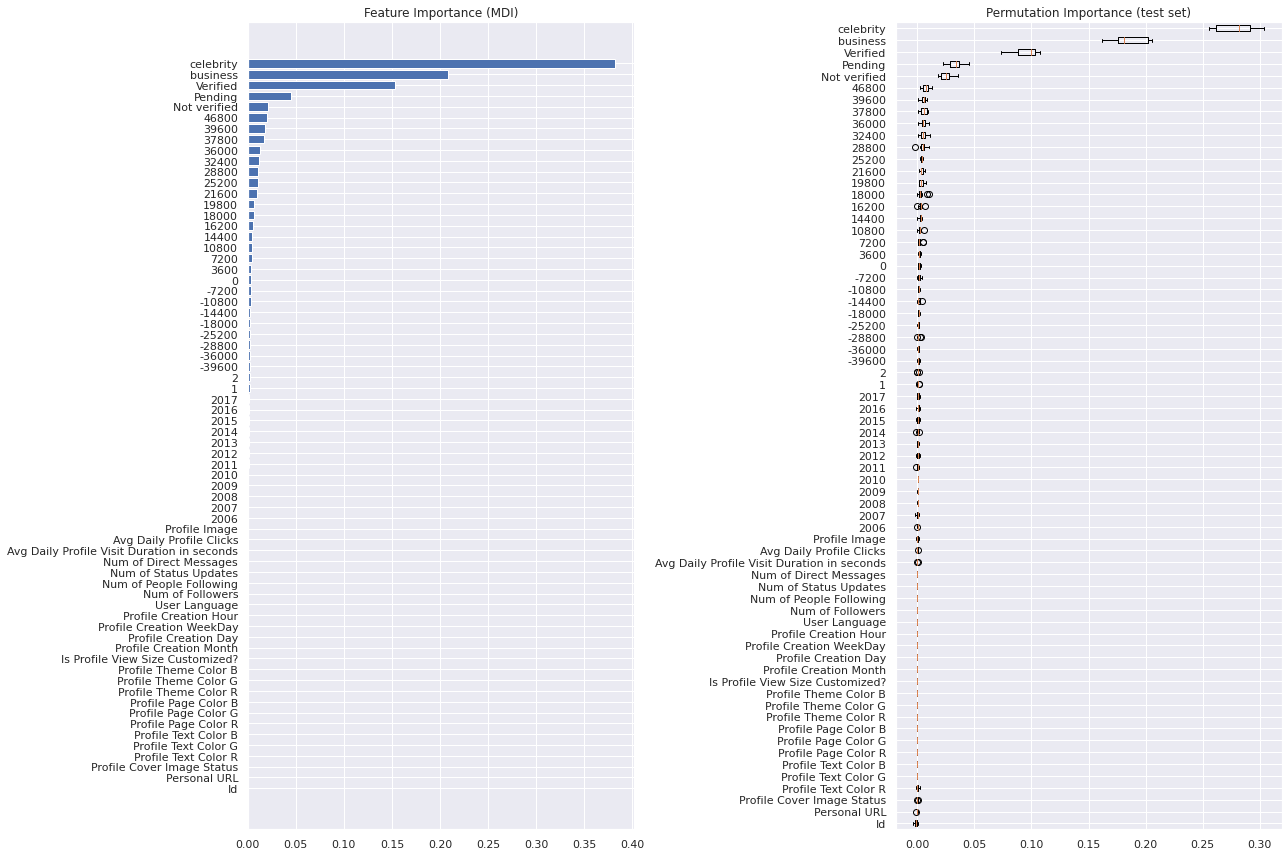

In [50]:
mask = np.array(best_f.get_support(indices=True))

from sklearn.inspection import permutation_importance
feature_importance = regressor.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(18, 12))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, train_data.columns[mask])
plt.title('Feature Importance (MDI)')

result = permutation_importance(regressor, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T, 
            vert=False, labels=train_data.columns[mask])
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

**Cross-validation**

**Cross-validation**

In [32]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

def CV(Model, X, y, k=10, *model_args, **model_kwargs):
    validation_losses = []
    for train_index, test_index in KFold(k).split(y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        predictor = Model(*model_args, **model_kwargs)
        predictor.fit(X_train, y_train)
        y_pred = predictor.predict(X_test)
        
        validation_losses.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    
    return np.array(validation_losses)

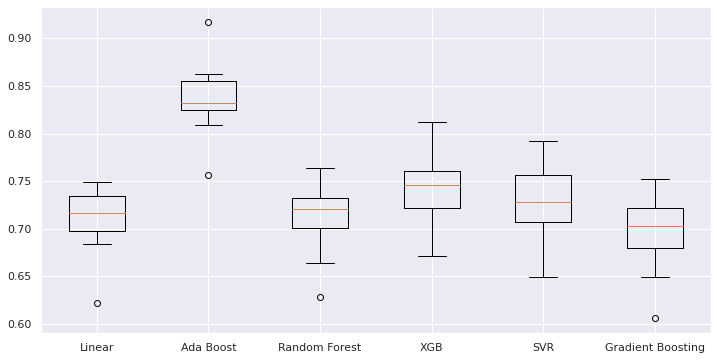

In [56]:
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import AdaBoostRegressor

from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor

from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import GradientBoostingRegressor

K = 10

reg_losses = []
reg_labels = []

# Evaluate every model with CV
reg_losses.append(CV(LinearRegression, X_train, y_train, K))
reg_labels.append("Linear")

reg_losses[-1] = np.where(reg_losses[-1] > 100, np.median(reg_losses[-1]), reg_losses[-1])

reg_losses.append(CV(AdaBoostRegressor, X_train, y_train, K, random_state=0, n_estimators=100))
reg_labels.append("Ada Boost")

reg_losses.append(CV(RandomForestRegressor, X_train, y_train, K))
reg_labels.append("Random Forest")

reg_losses.append(CV(XGBRegressor, X_train, y_train, K))
reg_labels.append("XGB")

reg_losses.append(CV(make_pipeline, X_train, y_train, K, StandardScaler(), SVR(C=1.0, epsilon=0.2)))
reg_labels.append("SVR")

reg_losses.append(CV(GradientBoostingRegressor, X_train, y_train, K, random_state=0))
reg_labels.append("Gradient Boosting")

plt.figure(figsize=(12,6))
plt.boxplot(reg_losses, labels=reg_labels)
plt.show()

**Testing with kera, not working for the moment**

In [34]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, BatchNormalization, Dropout
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

In [35]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

NN_model = keras.Sequential()

# The Input Layer :
NN_model.add(layers.Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(layers.Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(layers.Dropout(0.5))
NN_model.add(layers.BatchNormalization())
NN_model.add(layers.Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(layers.Dropout(0.5))
NN_model.add(layers.BatchNormalization())
NN_model.add(layers.Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(layers.Dropout(0.5))
NN_model.add(layers.BatchNormalization())

# The Output Layer :
NN_model.add(layers.Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               8832      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1

In [36]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = keras.callbacks.ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [37]:
def get_data():

    #get train data
    train = pd.read_pickle("train_cleaned_colors.pkl")
    
    #get test data
    test = pd.read_pickle("test_cleaned_colors.pkl")

    return train , test

def get_combined_data():
  #reading train data
  train , test = get_data()

  target = train["Num of Profile Likes"]
  train.drop(['Num of Profile Likes', 'Profile Image', ],axis = 1 , inplace = True)
  train.drop(['Id'], inplace=True, axis=1)
  return train, target

#Load train and test data into pandas DataFrames
train_data, test = get_data()

#Combine train and test data to process them together
train, target = get_combined_data()

In [38]:
target

2       3.193125
4       3.033021
5       2.230449
8       3.093071
9       2.722634
          ...   
7490    3.820661
7492    3.388101
7494    2.588832
7495    3.137987
7497    3.092018
Name: Num of Profile Likes, Length: 4021, dtype: float64

In [39]:
train_set = np.asarray(train).astype(np.float32)

In [40]:
NN_model.fit(train_set, target, epochs=20, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/20


ValueError: in user code:

    /mnt/Data/git/IFT6758_Competition/venv/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /mnt/Data/git/IFT6758_Competition/venv/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /mnt/Data/git/IFT6758_Competition/venv/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /mnt/Data/git/IFT6758_Competition/venv/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /mnt/Data/git/IFT6758_Competition/venv/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /mnt/Data/git/IFT6758_Competition/venv/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:789 run_step  **
        outputs = model.train_step(data)
    /mnt/Data/git/IFT6758_Competition/venv/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:747 train_step
        y_pred = self(x, training=True)
    /mnt/Data/git/IFT6758_Competition/venv/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:976 __call__
        self.name)
    /mnt/Data/git/IFT6758_Competition/venv/lib/python3.6/site-packages/tensorflow/python/keras/engine/input_spec.py:216 assert_input_compatibility
        ' but received input with shape ' + str(shape))

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 68 but received input with shape [None, 69]


In [195]:
NN_model.load_weights("Weights-013--0.53446.hdf5")
y_pred = NN_model.predict(X_test_selected_feats)

**Predict Kaggle Data**

In [166]:
train = cor_data.to_numpy()
y_train = train[:, -1] # for last column
X_train = train[:, :-1] # for all but last column

X_test = test_data.to_numpy()

X_train_scaled = minmax_scale(X_train)

In [237]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression

best_f = SelectKBest(f_regression, k=5)

X_selected_feat_likes = best_f.fit_transform(X_train, y_train)
X_test_selected_feats = best_f.transform(X_test)
X_train_selected_feats = best_f.transform(X_train)

mask = np.array(best_f.get_support(indices=True))

selected_feats = [labels[l] for l in mask]
print(selected_feats)

[ True False False False False False False False False False False False
  True False False False False False False  True  True  True False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False]


In [238]:
from xgboost import XGBRegressor
from sklearn import datasets, ensemble
from sklearn.ensemble import GradientBoostingRegressor

#regressor = XGBRegressor()
regressor = GradientBoostingRegressor(random_state=0)
regressor.fit(X_train_selected_feats, y_train)


y_pred = regressor.predict(X_test_selected_feats)

In [197]:
import csv
preds = 10 ** y_pred - 1
preds = np.around(preds)

with open('preds.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',', quotechar='|', 
                            quoting=csv.QUOTE_MINIMAL)
    
    spamwriter.writerow(['Id', 'Predicted'])

    for id, pred in zip(id_test, preds):
      spamwriter.writerow([id, pred])
